In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

In [117]:
# %pip install lib/extcolors
import extcolors

## Data Set

from Kaggle [Best Artworks of All Time](https://www.kaggle.com/ikarus777/best-artworks-of-all-time)

In [76]:
df_artists = pd.read_csv('data/best-artworks-of-all-time/artists.csv')
df_artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


## Color Extraction

Explore some ways to perform [color quantization](https://en.wikipedia.org/wiki/Color_quantization) and extract the main colors from the images.

In [136]:
image_path = 'data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_72.jpg'

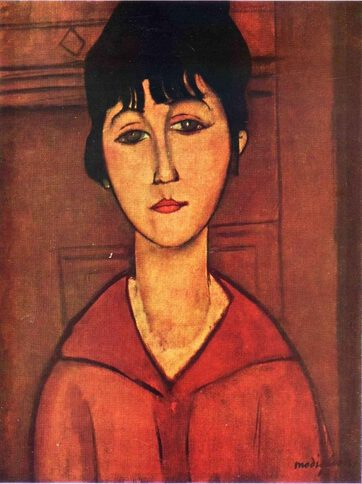

In [122]:
from IPython.display import Image
Image(filename=image_path) 

A utility function to print color blocks.

Just personal choices, I do this with HTML stuff

In [137]:
def color2css(color):
    if type(color) == str:
        return color # '#'+color.lstrip('#')
    
    # Assuming tuple (iterator)
    tp = 'rgb'
    if len(color) == 4:
        tp = 'rgba'
    return f'{tp}{tuple(c for c in color)}' 

def show_color_blocks(colors, labels=None, size='100px'):
    BLOCK_STYLE = f"""
        float: left; 
        width: {size}; height:{size}; 
        font-size: 8px;
        text-align: center;
        text-shadow: white 0px 0px 5px;
        border: 1px solid rgba(60,60,60,0.52);

        margin: 1px;
    """
    
    if labels is None:
        labels = [str(c) for c in colors]
    
    return HTML(''.join([
        f'<div style="background: {color2css(c)}; {BLOCK_STYLE}">{label}</div>'
        for c, label in zip(colors, labels)
    ]))

# example
show_color_blocks([
    (255, 127, 0, 0.5), 
    (255,255,255), 
    (0x6c,0x6c,0x6c),
    '#6c6c6c'
], size='100px')

### Color extraction with `extcolors`

In [138]:
data, pixel_count = extcolors.extract(
    "data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_72.jpg")
(data, pixel_count)

([((139, 74, 54), 131171),
  ((19, 19, 19), 42877),
  ((240, 212, 237), 340),
  ((248, 179, 84), 337),
  ((81, 14, 0), 308),
  ((96, 16, 19), 174),
  ((41, 26, 5), 1)],
 175208)

In [149]:
data, pixel_count = extcolors.extract(image_path, tolerance=32)

In [150]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

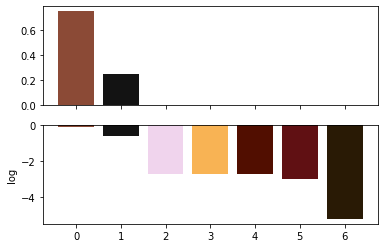

In [153]:
%matplotlib inline
colors = [tuple(i/255 for i in color) for color, _ in data]
histo = np.array([(count / pixel_count) for _, count in data])

x = range(len(labels))
_, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.bar(x, histo, color=colors)
ax2.bar(x, np.log10(histo), color=colors)
ax2.set_ylabel('log')
plt.show()

In [154]:
# Try similar color with lower res
data, pixel_count = extcolors.extract(image_path, tolerance=12)

colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

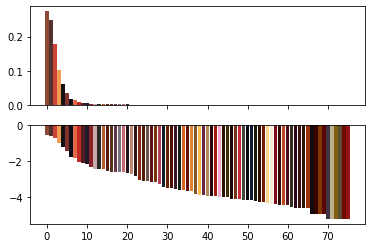

In [155]:
%matplotlib inline
colors = np.array([tuple(i/255 for i in color) for color, _ in data])
amounts = np.array([(count / pixel_count) for _, count in data])

x = range(len(labels))
_, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.bar(x, amounts, color=colors)
ax2.bar(x, np.log10(amounts), color=colors)
plt.show()

### In RGB color space

<IPython.core.display.Javascript object>


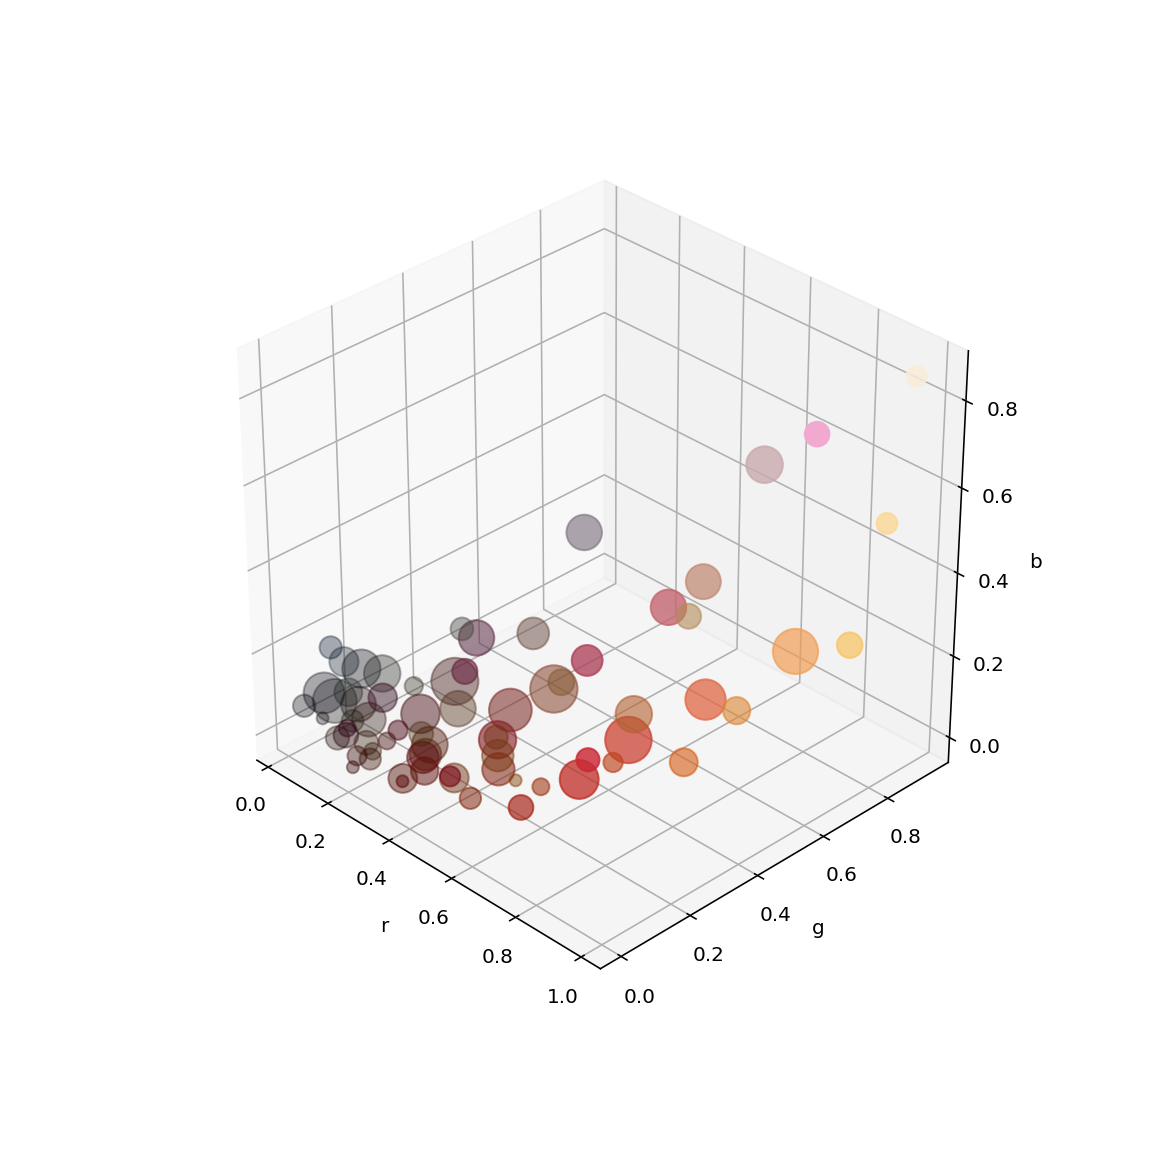

In [161]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')

sz = np.log10(amounts)
sz -= sz.min()
sz *= 120

ax.scatter(colors[:,0], colors[:,1], colors[:,2], 
           c=colors, marker='o', 
           s=sz
          )

ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')
plt.show()

### More explorartion on color extractions

In [89]:
# def count_dom_colors():
import time
start = time.time()
image_path = 'data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_73.jpg'
data, pixel_count = extcolors.extract(image_path, tolerance=40)
print(len(data))
time.time() - start

6


48.86907076835632

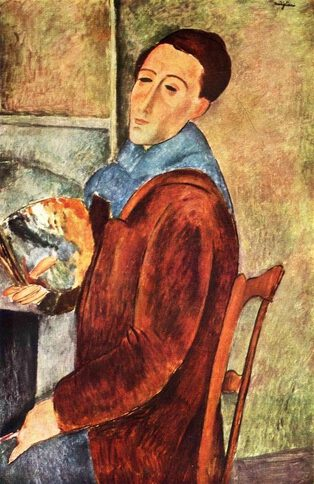

In [83]:
from IPython.display import Image
Image(filename=image_path) 

In [88]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

In [162]:
%mkdir data/tmp

In [163]:
from PIL import Image
im = Image.open(image_path)
im = im.resize((100, 100))
# im.show()
im.save('data/tmp/'+image_path.split('/')[-1])

In [164]:
# def count_dom_colors():
import time
start = time.time()
image_path = 'data/out/Amedeo_Modigliani_73.jpg'
data, pixel_count = extcolors.extract(image_path, tolerance=10)
print(len(data))
time.time() - start

141


0.5905389785766602

In [165]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

In [109]:
c1 = colors[0]
c2 = colors[1]
c1_=255-np.array(c1)

In [115]:
sum(np.square(c1_-np.array(c2)))

19664

(127, 53, 44)

array([ 47,  93, 152])